## 강의 1: 시계열 데이터 분석 EDA (Bike Sharing Demand)

이 노트북은 `timeseries_lecture1_eda_1.ipynb`와 동일한 내용을 정리용으로 제공합니다. 실제 실행은 `timeseries_lecture1_eda_1.ipynb`에서 진행하세요.



# 1강 — 시계열 데이터 이해와 분석 (Bike Sharing Demand)

이 노트북은 **정형데이터 기반 시계열 분석**의 기초를 다룹니다.
데이터 로드 → datetime 처리 → 파생변수 생성 → EDA(시각화) 흐름으로 진행합니다.

> 모든 그래프는 `matplotlib`만 사용합니다. 한 차트당 하나의 플롯만 사용합니다.

In [6]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'  # macOS 기본 한글 폰트
mpl.rcParams['axes.unicode_minus'] = False   # 마이너스 깨짐 방지

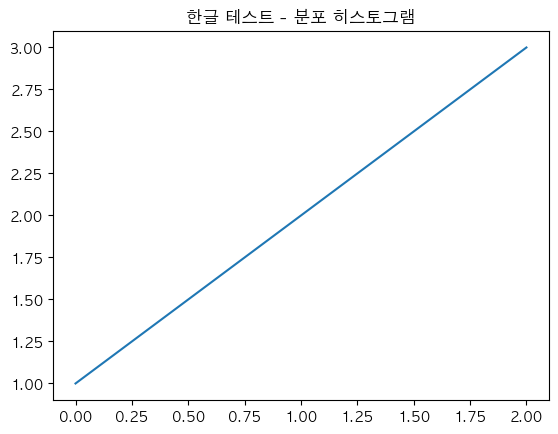

In [7]:
import matplotlib.pyplot as plt
plt.plot([1,2,3])
plt.title('한글 테스트 - 분포 히스토그램')
plt.show()

## 1. 데이터 로드 & 확인

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# 데이터 로드 (로컬/카글 환경 모두 호환)
def load_bike_train():
    candidate_paths = [
        '/mnt/data/train.csv',
        '/Users/kimjinseok/Desktop/메타코드 강의/bike-sharing-demand/train.csv',
        'bike-sharing-demand/train.csv',
        './train.csv'
    ]
    for p in candidate_paths:
        if os.path.exists(p):
            return pd.read_csv(p)
    raise FileNotFoundError('train.csv 경로를 찾을 수 없습니다. 위 후보 경로를 확인하세요.')

df = load_bike_train()
df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [2]:

# 기본 정보 확인
print(df.info())
print("\n기초 통계\n", df.describe(include='all'))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None

기초 통계
                    datetime        season       holiday    workingday  \
count                 10886  10886.000000  10886.000000  10886.000000   
unique                10886           NaN           NaN           NaN   
top     2011-01-01 0

## 2. datetime 처리 & 파생 변수 생성

In [3]:

# datetime 변환
df['datetime'] = pd.to_datetime(df['datetime'])

# 파생 변수
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.weekday  # Monday=0, Sunday=6

# 확인
df[['datetime','year','month','day','hour','weekday']].head()


,datetime,year,month,day,hour,weekday
0,2011-01-01 00:00:00,2011,1,1,0,5
1,2011-01-01 01:00:00,2011,1,1,1,5
2,2011-01-01 02:00:00,2011,1,1,2,5
3,2011-01-01 03:00:00,2011,1,1,3,5
4,2011-01-01 04:00:00,2011,1,1,4,5


In [4]:

# 결측치 확인
df.isna().sum()


datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
year          0
month         0
day           0
hour          0
weekday       0
dtype: int64

## 3. 타겟 분포 (count)

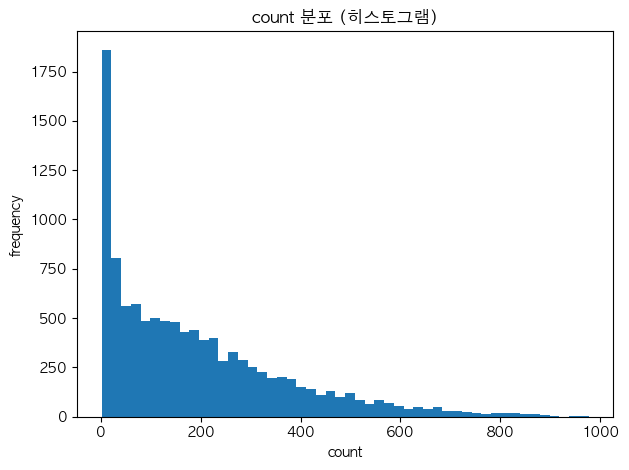

In [9]:

plt.figure()
plt.hist(df['count'], bins=50)
plt.title('count 분포 (히스토그램)')
plt.xlabel('count')
plt.ylabel('frequency')
plt.tight_layout()
plt.show()


## 4. 시계열 패턴 (월/시간/요일)

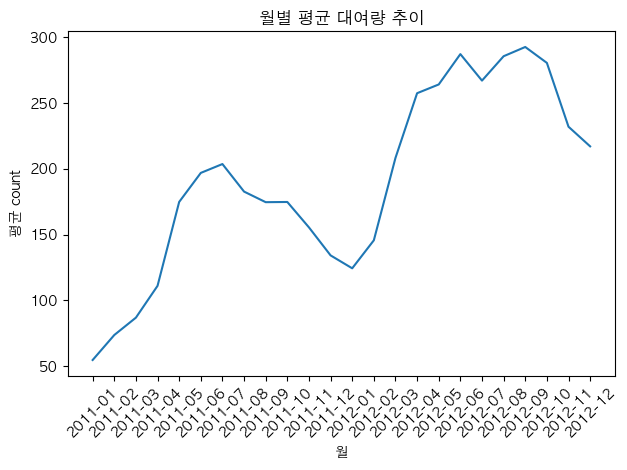

In [11]:

# 월별 평균 대여량
monthly = df.groupby(['year','month'])['count'].mean().reset_index()
monthly['yyyymm'] = monthly['year'].astype(str) + '-' + monthly['month'].astype(str).str.zfill(2)

plt.figure()
plt.plot(monthly['yyyymm'], monthly['count'])
plt.title('월별 평균 대여량 추이')
plt.xlabel('월')
plt.ylabel('평균 count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


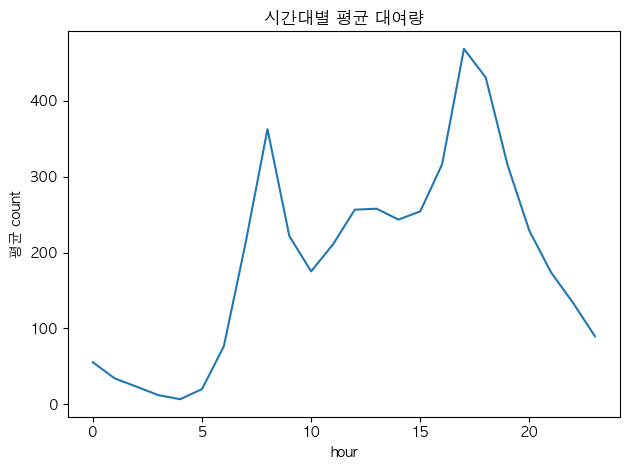

In [12]:

# 시간대별 평균 대여량
hourly = df.groupby('hour')['count'].mean().reset_index()

plt.figure()
plt.plot(hourly['hour'], hourly['count'])
plt.title('시간대별 평균 대여량')
plt.xlabel('hour')
plt.ylabel('평균 count')
plt.tight_layout()
plt.show()


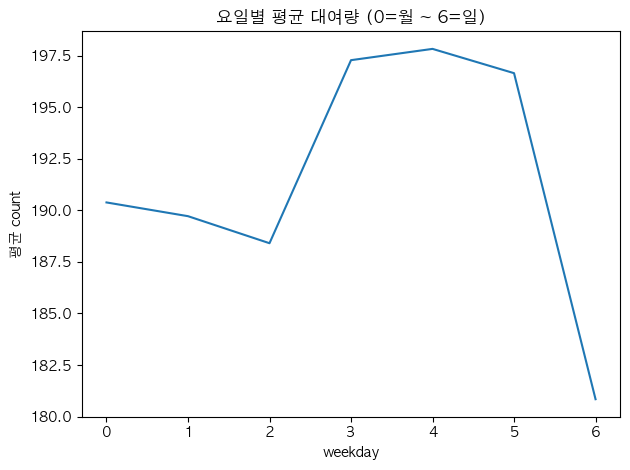

In [13]:

# 요일별 평균 대여량 (0=월 ~ 6=일)
weekday = df.groupby('weekday')['count'].mean().reset_index()

plt.figure()
plt.plot(weekday['weekday'], weekday['count'])
plt.title('요일별 평균 대여량 (0=월 ~ 6=일)')
plt.xlabel('weekday')
plt.ylabel('평균 count')
plt.tight_layout()
plt.show()


## 5. 다변량 관계 (날씨/기상 변수 vs count)

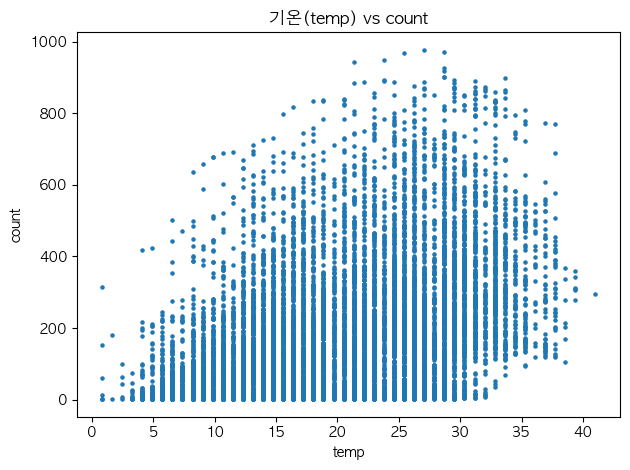

In [14]:

# 기온 vs count
plt.figure()
plt.scatter(df['temp'], df['count'], s=5)
plt.title('기온(temp) vs count')
plt.xlabel('temp')
plt.ylabel('count')
plt.tight_layout()
plt.show()


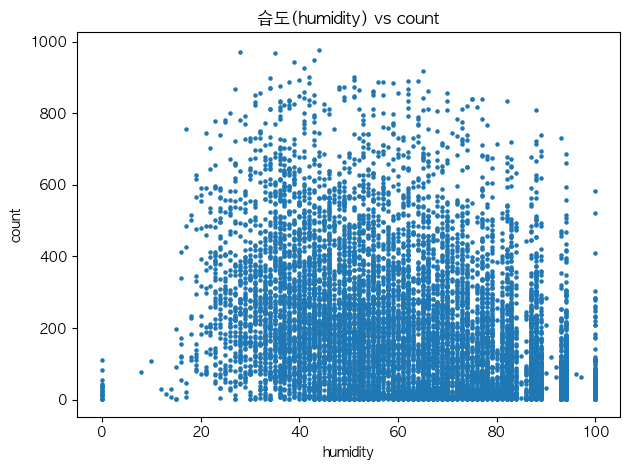

In [15]:

# 습도 vs count
plt.figure()
plt.scatter(df['humidity'], df['count'], s=5)
plt.title('습도(humidity) vs count')
plt.xlabel('humidity')
plt.ylabel('count')
plt.tight_layout()
plt.show()


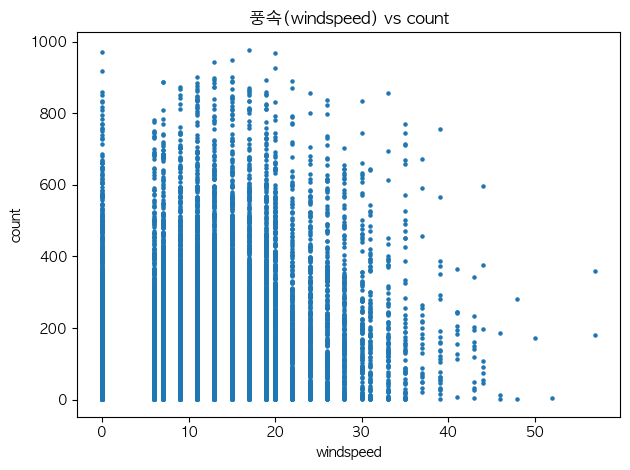

In [16]:

# 풍속 vs count
plt.figure()
plt.scatter(df['windspeed'], df['count'], s=5)
plt.title('풍속(windspeed) vs count')
plt.xlabel('windspeed')
plt.ylabel('count')
plt.tight_layout()
plt.show()


## 6. 범주형 변수별 차이 (season/holiday/workingday/weather)

In [17]:

# 각 범주에 대한 count 요약 통계
summary = (
    df.groupby('season')['count'].describe()[['mean','std','min','25%','50%','75%','max']]
    .rename_axis('season')
)
summary


,mean,std,min,25%,50%,75%,max
season,,,,,,,
1,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [19]:

#from caas_jupyter_tools import display_dataframe_to_user
from IPython.display import display
def display_dataframe_to_user(title, df):
    print(title)
    display(df)
display_dataframe_to_user("Season별 count 요약", summary.reset_index())


Season별 count 요약


,season,mean,std,min,25%,50%,75%,max
0,1,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
1,2,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
2,3,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
3,4,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


In [20]:

summary2 = (
    df.groupby('holiday')['count'].describe()[['mean','std','min','25%','50%','75%','max']]
    .rename_axis('holiday')
)
display_dataframe_to_user("Holiday별 count 요약", summary2.reset_index())


Holiday별 count 요약


,holiday,mean,std,min,25%,50%,75%,max
0,0,191.741655,181.513131,1.0,43.0,145.0,283.0,977.0
1,1,185.877814,168.300531,1.0,38.5,133.0,308.0,712.0


In [21]:

summary3 = (
    df.groupby('workingday')['count'].describe()[['mean','std','min','25%','50%','75%','max']]
    .rename_axis('workingday')
)
display_dataframe_to_user("Workingday별 count 요약", summary3.reset_index())


Workingday별 count 요약


,workingday,mean,std,min,25%,50%,75%,max
0,0,188.506621,173.724015,1.0,44.0,128.0,304.0,783.0
1,1,193.011873,184.513659,1.0,41.0,151.0,277.0,977.0


In [22]:

summary4 = (
    df.groupby('weather')['count'].describe()[['mean','std','min','25%','50%','75%','max']]
    .rename_axis('weather')
)
display_dataframe_to_user("Weather별 count 요약", summary4.reset_index())


Weather별 count 요약


,weather,mean,std,min,25%,50%,75%,max
0,1,205.236791,187.959566,1.0,48.0,161.0,305.0,977.0
1,2,178.955540,168.366413,1.0,41.0,134.0,264.0,890.0
2,3,118.846333,138.581297,1.0,23.0,71.0,161.0,891.0
3,4,164.000000,NaN,164.0,164.0,164.0,164.0,164.0


## 7. Heatmap: 요일 × 시간대 평균 대여량

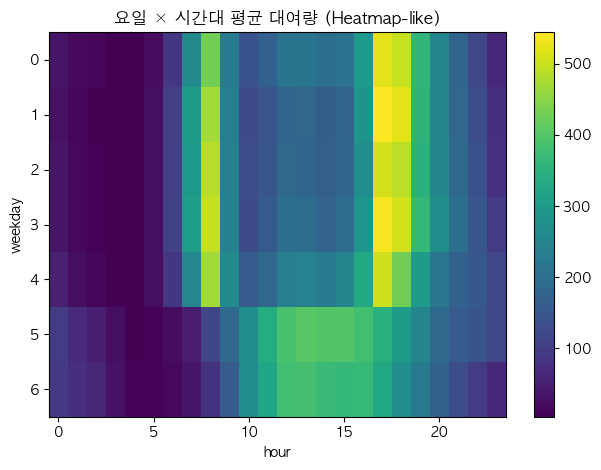

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,35.492308,18.076923,10.666667,5.677966,6.140625,22.415385,89.246154,260.400000,428.107692,226.353846,...,199.569231,210.153846,295.046154,521.384615,499.569231,359.938462,249.676923,178.953846,120.030769,66.769231
1,27.328125,11.904762,6.203125,4.034483,5.241935,24.015625,105.375000,297.609375,469.171875,236.140625,...,162.476923,181.076923,284.107692,544.169231,522.815385,356.123077,249.907692,183.215385,130.630769,76.061538
2,36.246154,15.615385,8.365079,5.000000,4.629032,25.046154,105.815385,297.246154,485.184615,238.769231,...,166.923077,179.584615,268.430769,509.261538,489.400000,348.230769,251.569231,190.661538,140.400000,80.138462
3,37.476923,15.415385,8.421875,4.868852,5.301587,25.507692,108.230769,307.692308,496.553846,241.815385,...,174.661538,193.461538,288.323077,536.553846,506.815385,364.046154,272.323077,199.707692,148.861538,99.630769
4,53.234375,24.453125,12.531250,6.322581,5.932203,23.375000,91.359375,254.109375,470.203125,262.406250,...,227.062500,248.453125,331.500000,502.015625,427.593750,303.562500,216.796875,170.921875,152.625000,119.546875


In [23]:

# 피벗 테이블
pivot = df.pivot_table(index='weekday', columns='hour', values='count', aggfunc='mean')

# matplotlib imshow로 heatmap 유사 시각화
plt.figure()
plt.imshow(pivot.values, aspect='auto')
plt.title('요일 × 시간대 평균 대여량 (Heatmap-like)')
plt.xlabel('hour')
plt.ylabel('weekday')
plt.colorbar()
plt.tight_layout()
plt.show()

pivot.head()


## 8. Trend/Seasonality 시각화 (주 평균 추이)

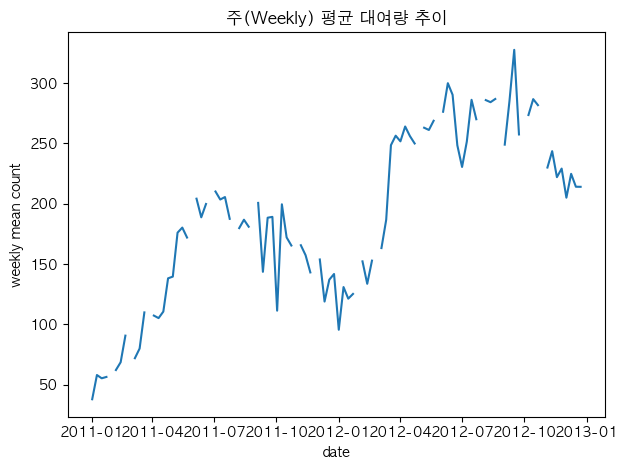

In [24]:

# 주 단위 평균 추이
df_weekly = df.set_index('datetime')['count'].resample('W').mean()

plt.figure()
plt.plot(df_weekly.index, df_weekly.values)
plt.title('주(Weekly) 평균 대여량 추이')
plt.xlabel('date')
plt.ylabel('weekly mean count')
plt.tight_layout()
plt.show()


## 2.5 추가 EDA — 더 깊은 인사이트
- **목표**: 단순 평균을 넘어, 운용/마케팅 관점에서 바로 쓰일 수 있는 인사이트를 도출합니다.
- **핵심 질문**: 누가(registered vs casual), 언제(요일/시간), 어떤 환경(날씨)에서 많이 타는가?


In [25]:
# 사람이 읽기 쉬운 레이블 추가
season_map = {1: '봄', 2: '여름', 3: '가을', 4: '겨울'}
weather_map = {1: '맑음/약간 구름', 2: '안개/구름', 3: '가벼운 눈/비', 4: '심한 눈/비'}

df['season_name'] = df['season'].map(season_map)
df['weather_name'] = df['weather'].map(weather_map)

df[['season','season_name','weather','weather_name']].head()


,season,season_name,weather,weather_name
0,1,봄,1,맑음/약간 구름
1,1,봄,1,맑음/약간 구름
2,1,봄,1,맑음/약간 구름
3,1,봄,1,맑음/약간 구름
4,1,봄,1,맑음/약간 구름


In [26]:
# 결측/누락 시간 체크 (연속성 검증)
idx_full = pd.date_range(df['datetime'].min(), df['datetime'].max(), freq='H')
missing_hours = set(idx_full) - set(pd.to_datetime(df['datetime']))
print(f"누락 시간 개수: {len(missing_hours)}")
list(sorted(list(missing_hours))[:10])  # 앞 10개만 미리보기


누락 시간 개수: 6370


/var/folders/48/477vrv_n08b185fbd1ycjrqh0000gn/T/ipykernel_15953/2274797505.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  idx_full = pd.date_range(df['datetime'].min(), df['datetime'].max(), freq='H')


[Timestamp('2011-01-02 05:00:00'),
 Timestamp('2011-01-03 02:00:00'),
 Timestamp('2011-01-03 03:00:00'),
 Timestamp('2011-01-04 03:00:00'),
 Timestamp('2011-01-05 03:00:00'),
 Timestamp('2011-01-06 03:00:00'),
 Timestamp('2011-01-07 03:00:00'),
 Timestamp('2011-01-11 03:00:00'),
 Timestamp('2011-01-11 04:00:00'),
 Timestamp('2011-01-12 03:00:00')]

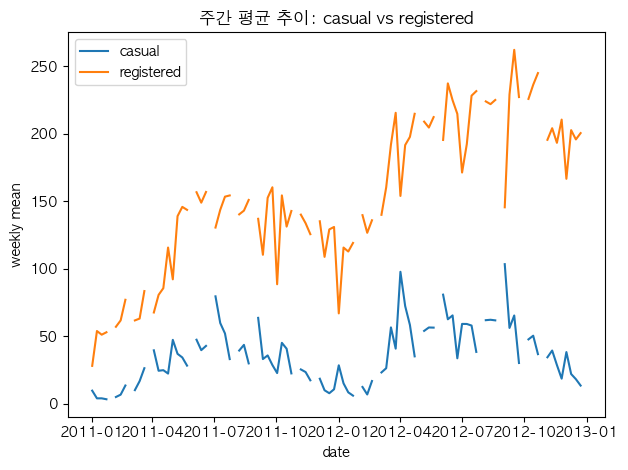

In [27]:
# 사용자 유형별 주간(Weekly) 평균 추이 — 누가 더 기여하나?
df_w = df.set_index('datetime')[['casual','registered']].resample('W').mean()
plt.figure()
plt.plot(df_w.index, df_w['casual'], label='casual')
plt.plot(df_w.index, df_w['registered'], label='registered')
plt.title('주간 평균 추이: casual vs registered')
plt.xlabel('date')
plt.ylabel('weekly mean')
plt.legend()
plt.tight_layout()
plt.show()


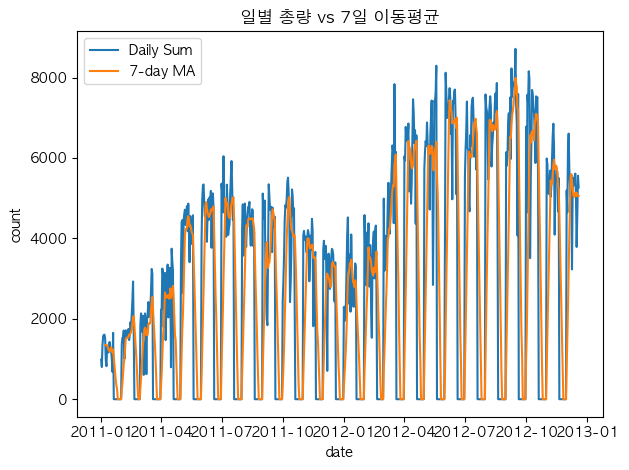

In [28]:
# 일별 총량과 7일 이동평균(추세 부드럽게)
daily = df.set_index('datetime')['count'].resample('D').sum()
roll7 = daily.rolling(7).mean()
plt.figure()
plt.plot(daily.index, daily.values, label='Daily Sum')
plt.plot(roll7.index, roll7.values, label='7-day MA')
plt.title('일별 총량 vs 7일 이동평균')
plt.xlabel('date')
plt.ylabel('count')
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/48/477vrv_n08b185fbd1ycjrqh0000gn/T/ipykernel_15953/1673875596.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_temp = df.groupby('temp_bin')['count'].mean()


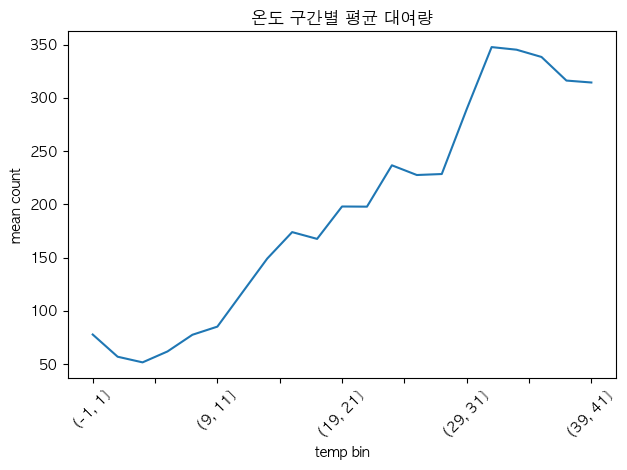

/var/folders/48/477vrv_n08b185fbd1ycjrqh0000gn/T/ipykernel_15953/1673875596.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_hum = df.groupby('hum_bin')['count'].mean()


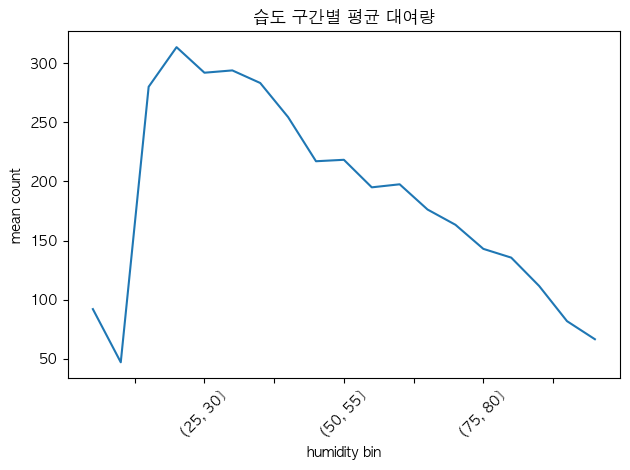

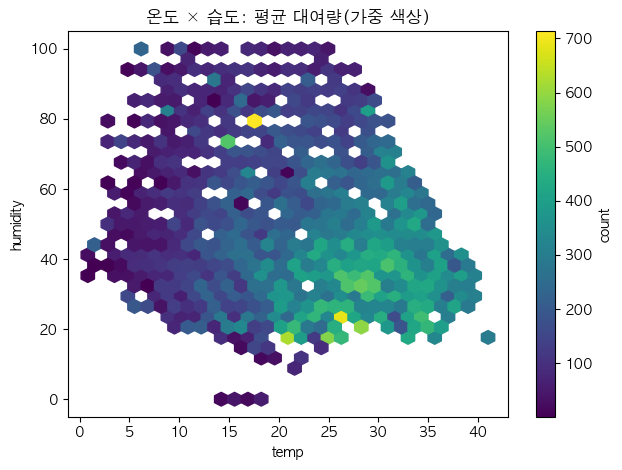

In [29]:
# 온도/습도 효과 — 구간화(binning)와 2D 패턴
# 1) 온도 구간별 평균
bins = np.arange(int(df['temp'].min())-1, int(df['temp'].max())+2, 2)
df['temp_bin'] = pd.cut(df['temp'], bins=bins)
by_temp = df.groupby('temp_bin')['count'].mean()
plt.figure()
by_temp.plot()
plt.xticks(rotation=45)
plt.title('온도 구간별 평균 대여량')
plt.xlabel('temp bin')
plt.ylabel('mean count')
plt.tight_layout()
plt.show()

# 2) 습도 구간별 평균
bins_h = np.arange(0, 101, 5)
df['hum_bin'] = pd.cut(df['humidity'], bins=bins_h)
by_hum = df.groupby('hum_bin')['count'].mean()
plt.figure()
by_hum.plot()
plt.xticks(rotation=45)
plt.title('습도 구간별 평균 대여량')
plt.xlabel('humidity bin')
plt.ylabel('mean count')
plt.tight_layout()
plt.show()

# 3) 2차원 패턴(온도 × 습도)
plt.figure()
plt.hexbin(df['temp'], df['humidity'], C=df['count'], gridsize=30, cmap='viridis')
plt.title('온도 × 습도: 평균 대여량(가중 색상)')
plt.xlabel('temp')
plt.ylabel('humidity')
cb = plt.colorbar()
cb.set_label('count')
plt.tight_layout()
plt.show()


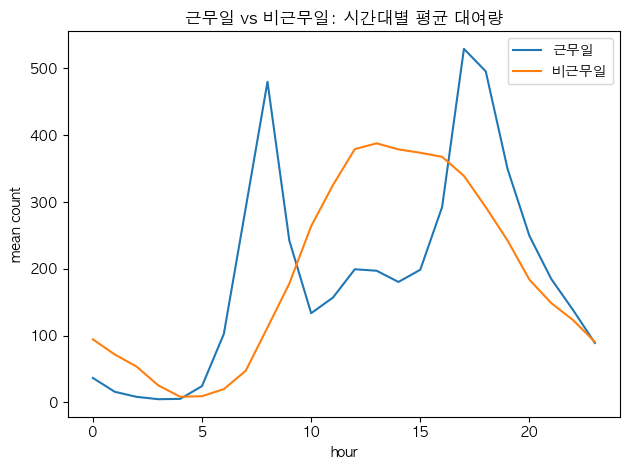

In [30]:
# 근무일/비근무일에 따른 시간대 패턴 비교
prof_work = df[df['workingday']==1].groupby('hour')['count'].mean()
prof_non  = df[df['workingday']==0].groupby('hour')['count'].mean()
plt.figure()
plt.plot(prof_work.index, prof_work.values, label='근무일')
plt.plot(prof_non.index, prof_non.values, label='비근무일')
plt.title('근무일 vs 비근무일: 시간대별 평균 대여량')
plt.xlabel('hour')
plt.ylabel('mean count')
plt.legend()
plt.tight_layout()
plt.show()


/var/folders/48/477vrv_n08b185fbd1ycjrqh0000gn/T/ipykernel_15953/3045245895.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  s = df.set_index('datetime')['count'].asfreq('H')


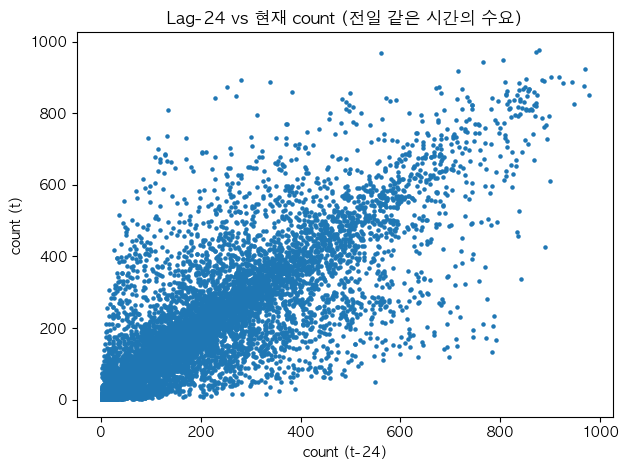

Lag-24 상관계수: 0.820


In [31]:
# 자기상관 힌트: 전일 같은 시간(lag 24)과의 관계
s = df.set_index('datetime')['count'].asfreq('H')
lag24 = s.shift(24)
valid = (~s.isna()) & (~lag24.isna())
plt.figure()
plt.scatter(lag24[valid], s[valid], s=5)
plt.title('Lag-24 vs 현재 count (전일 같은 시간의 수요)')
plt.xlabel('count (t-24)')
plt.ylabel('count (t)')
plt.tight_layout()
plt.show()

corr = np.corrcoef(lag24[valid], s[valid])[0,1]
print(f"Lag-24 상관계수: {corr:.3f}")


In [32]:
# 급변 일자 탐색: 일별 차분의 절댓값 Top-10
daily_sum = df.set_index('datetime')['count'].resample('D').sum()
delta = daily_sum.diff().abs().sort_values(ascending=False)
print('일별 수요 급변 Top-10 일자:')
print(delta.head(10))


일별 수요 급변 Top-10 일자:
datetime
2012-05-20    8294.0
2012-09-20    7591.0
2012-08-01    7580.0
2012-06-20    6825.0
2012-10-01    6778.0
2012-07-20    6591.0
2012-04-20    6565.0
2012-03-20    6153.0
2012-09-01    6140.0
2012-04-01    6041.0
Name: count, dtype: float64


## 9. 정리
- datetime 파싱과 파생변수는 시계열 분석의 출발점입니다.
- 월/시간/요일/날씨 변수로부터 **명확한 패턴**을 확인했습니다.
- 2강에서는 이 데이터로 **RandomForest, Prophet, SARIMAX** 모델을 학습하고 성능을 비교합니다.